<span style = "font-family: Arial; font-weight:bold;font-size:2.5em;color:blue;">Cardio Equipment Sales EDA

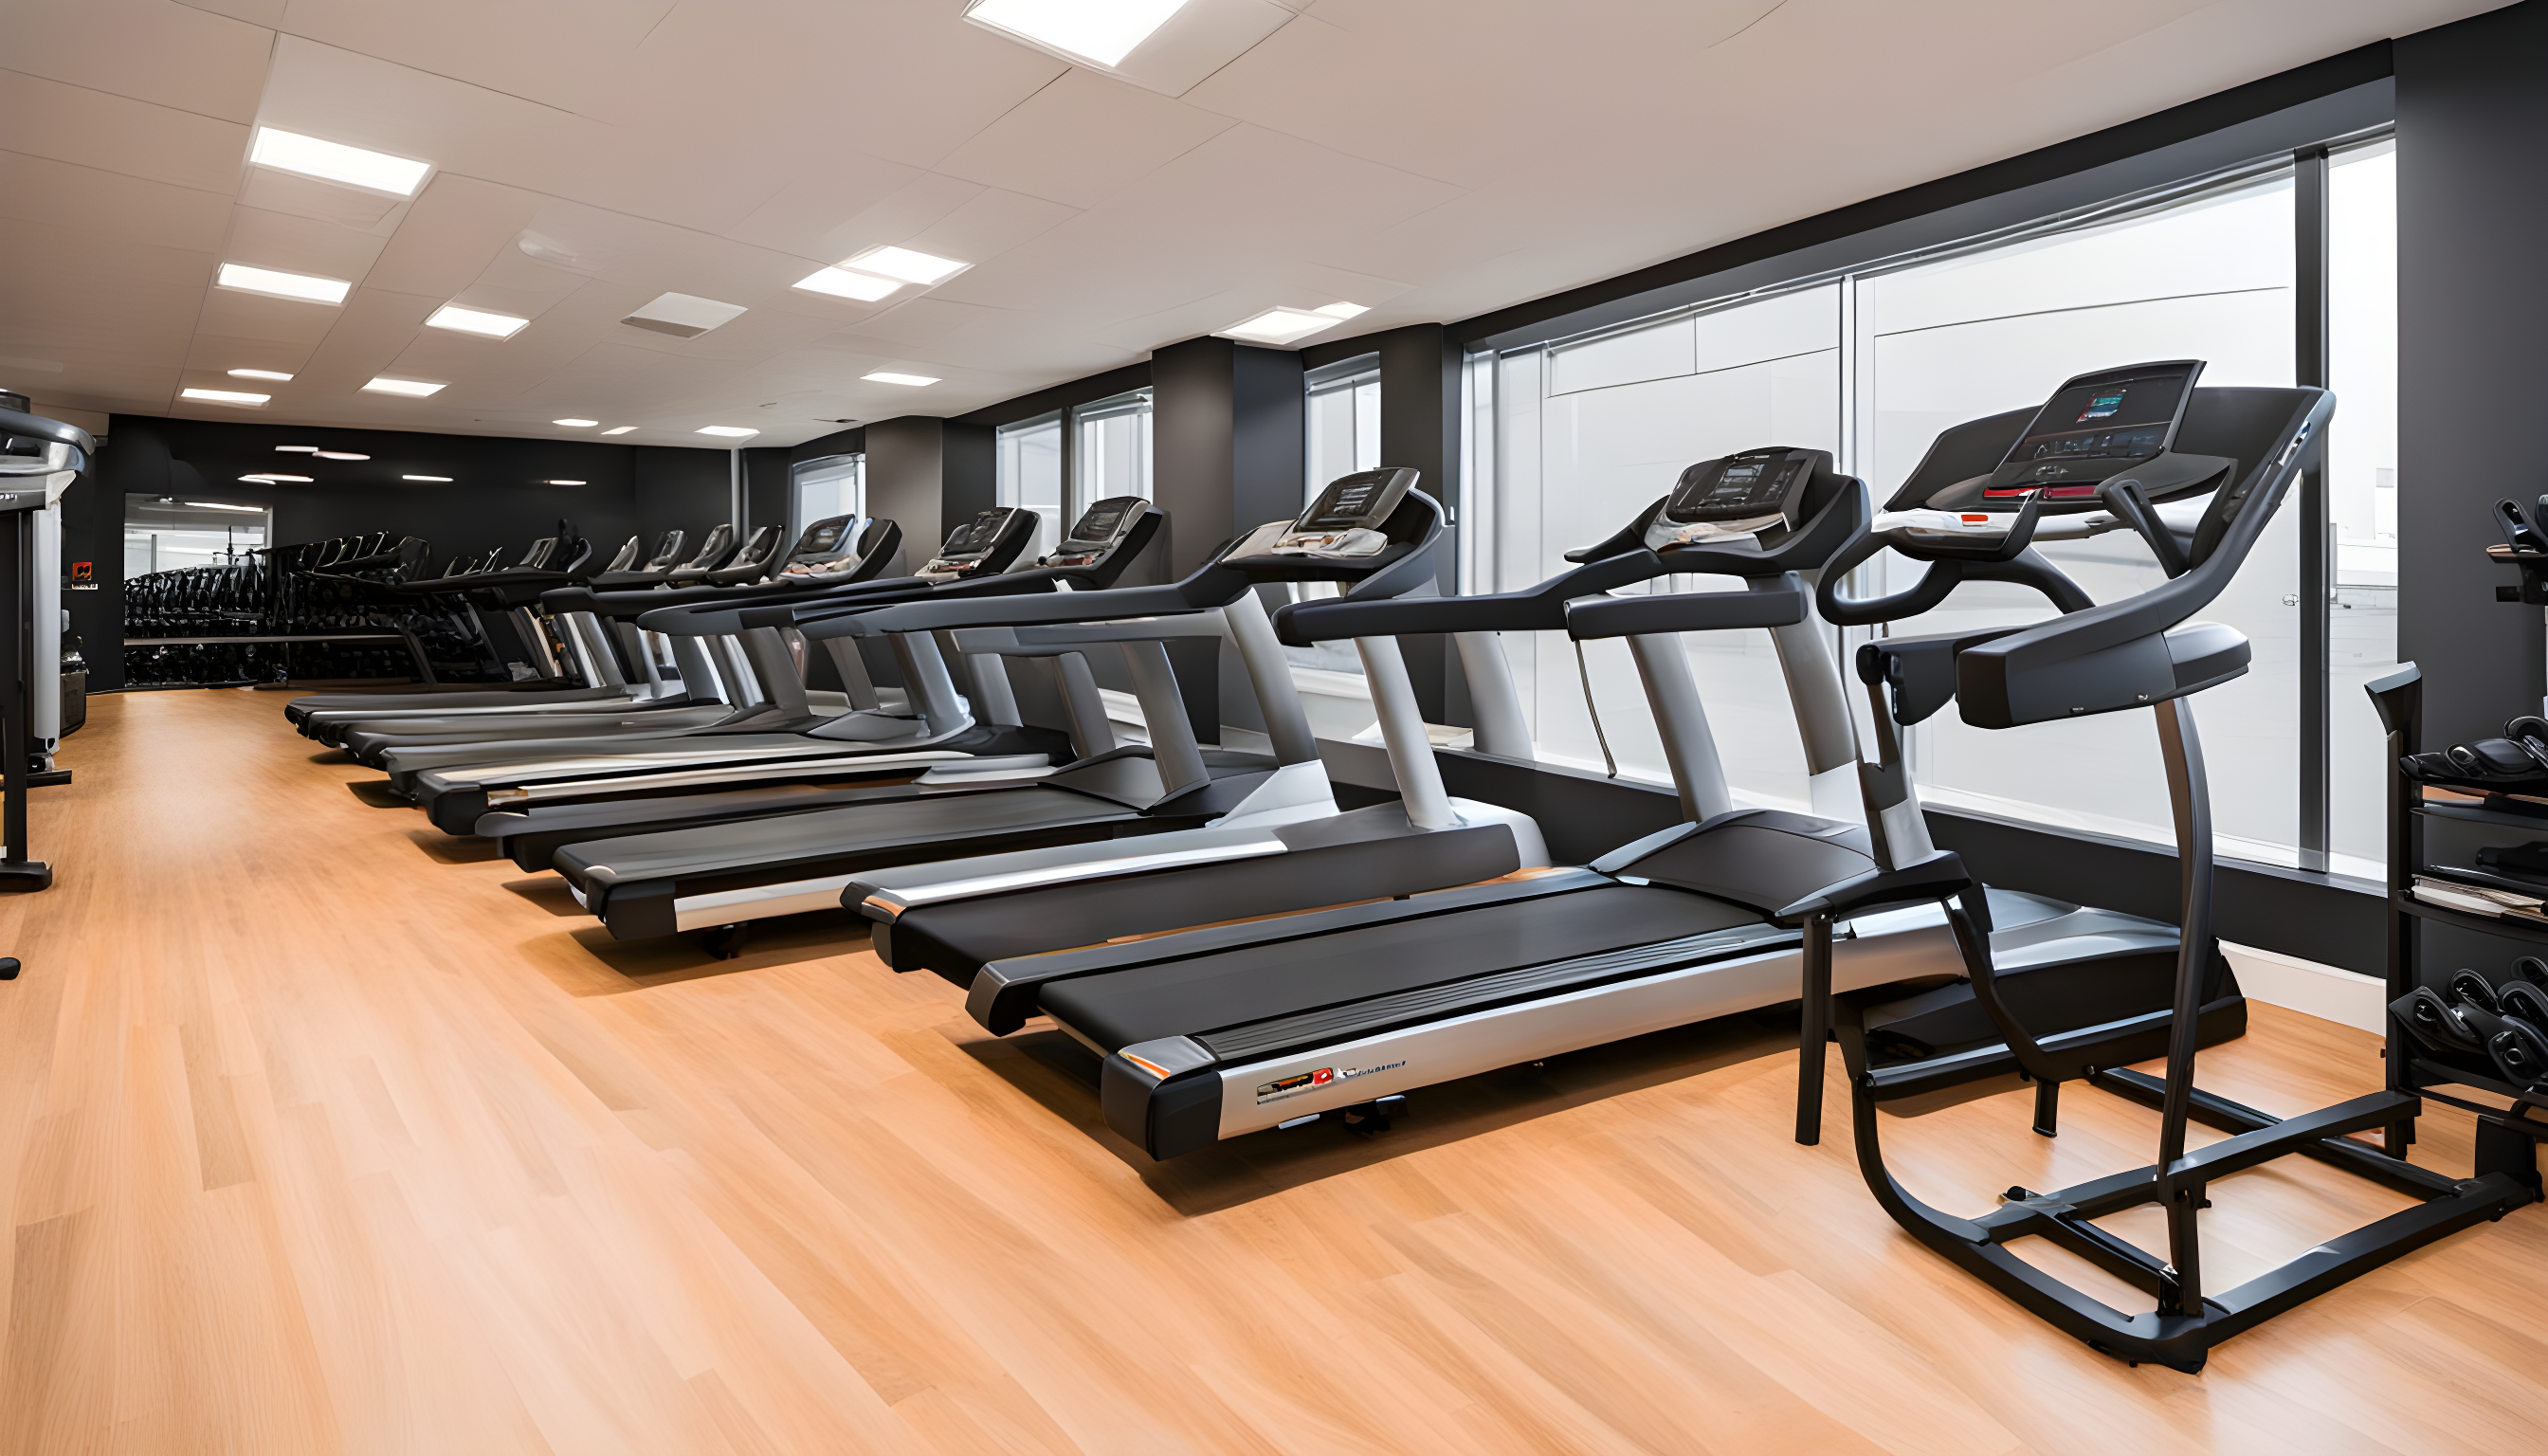

<span style = "font-family: Arial; font-weight:bold;font-size:2.2em;color:black;"> Introduction

CardioGood is a leading treadmill manufacturer that offers a range of models to meet varying customer needs. This sales dataset provides insights into CardioGood's customers across three treadmill products - the TM195, TM498 and TM798. It includes customer demographics like age, gender, education level and marital status. Usage information covers the average expected weekly usage frequency and mileage. Customers also provide a self-assessed fitness score.

The key variables in the data relate to customer demographics and treadmill usage. Demographic data covers each customer's age, gender, education level and marital status. Usage variables indicate how often the customer expects to use the treadmill each week and estimated weekly mileage.Analyzing trends and patterns in this sales data can help CardioGood better understand their customers. Identifying relationships between customer characteristics and product selections can inform marketing strategies. Customer usage and mileage statistics can aid product development. Segmenting customers into groups can enable more targeted sales and promotional campaigns.

<a id="Objectives"></a>
<span style = "font-family: Arial; font-weight:bold;font-size:2.2em;color:black;"> Objectives

1. <a href="#Question1">How do customer demographics (age, gender, education, marital status) compare across purchasers of the 3 treadmill models?</a>
2. <a href="#Question2">Is there a relationship between customer income level and the treadmill model purchased?</a>
3. <a href="#Question3">Do trends emerge in the expected usage frequencies and weekly mileage across the 3 product models?</a>

---

# Importing Libraries

In [1]:
# Basic packages
from scipy.stats import chi2_contingency
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as spy
from scipy import stats
import math
%matplotlib inline

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

# Data ingestion 

In [3]:
# Load dataset
data = pd.read_csv('CardioEqptSales.csv')

# Data Inspection

## Preview dataset

In [4]:
# Preview the dataset
# View the first 5, last 5 and random 10 rows
print('First five rows', '--'*55)
display(data.head())

print('Last five rows', '--'*55)
display(data.tail())

print('Random ten rows', '--'*55)
np.random.seed(1)
display(data.sample(n=10))

First five rows --------------------------------------------------------------------------------------------------------------


Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

Last five rows --------------------------------------------------------------------------------------------------------------


Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
175   TM798   40   Male         21        Single      6        5   83416   
176   TM798   42   Male         18        Single      5        4   89641   
177   TM798   45   Male         16        Single      5        5   90886   
178   TM798   47   Male         18     Partnered      4        5  104581   
179   TM798   48   Male         18     Partnered      4        5   95508   

     Miles  
175    200  
176    200  
177    160  
178    120  
179    180

Random ten rows --------------------------------------------------------------------------------------------------------------


Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
116   TM498   31  Female         16     Partnered      2        3   51165   
112   TM498   29  Female         14     Partnered      3        3   51165   
99    TM498   25    Male         16     Partnered      2        2   52302   
161   TM798   27    Male         21     Partnered      4        4   90886   
35    TM195   26  Female         16     Partnered      4        3   52302   
54    TM195   30    Male         14        Single      3        3   54576   
69    TM195   38  Female         14     Partnered      2        3   54576   
19    TM195   23  Female         15     Partnered      2        2   34110   
110   TM498   26    Male         16        Single      4        3   51165   
127   TM498   34    Male         15        Single      3        3   67083   

     Miles  
116     64  
112     95  
99      42  
161    100  
35     113  
54      85  
69      56  
19      38  
110    106  
127     85

**Initial observations**
* `Product`, `Gender` & `MaritalStatus` are categorical variables.
* `Age`, `Education`, `Usage`, `Fitness` & `Miles` are numerical variables.

---

## Variable List

In [5]:
# Display list of variables in dataset
variable_list = data.columns.tolist()
print(variable_list)

['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']


---

## Dataset shape

In [6]:
shape = data.shape
n_rows = shape[0]
n_cols = shape[1]
print(f"The Dataframe consists of '{n_rows}' rows and '{n_cols}' columns")

The Dataframe consists of '180' rows and '9' columns


---

## Data info

In [7]:
# Get info of the dataframe columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observations**
* All columns have values as there are `180` rows and each column has `180 non-null` elements
* `Product`, `Gender` & `MaritalStatus` have the **object** datatype. They should be categorical values.
* `Usage` & `Fitness` are numerical ordinal variables

---

**Panda Object Variable states**

In [8]:
# Panda Object Variable states function

def pandas_object_states(data):
    """
    This function checks if the variable type is pandas Object and
    displays the states and counts of each
    """
    # Loop through all variables
    for var in data.columns:
        # Check for pandas Object type
        if data[var].dtypes == "object":
            print('Unique values in', var, 'are :')
            print(data[var].value_counts().sort_index())
            print('--'*55)

In [9]:
# Check the states of all pandas Object variables
pandas_object_states(data)

Unique values in Product are :
Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in Gender are :
Gender
Female     76
Male      104
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in MaritalStatus are :
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------


---

**Convert Pandas Objects to Category type**

In [10]:
# Convert variables with "object" type to "category" type
for i in data.columns:
    if data[i].dtypes == "object":
        data[i] = data[i].astype("category") 

# Confirm if there no variables with "object" type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


**Missing value summary function**

In [11]:
def missing_val_chk(data):
    """
    This function to checks for missing values 
    and generates a summary.
    """
    if data.isnull().sum().any() == True:
        # Number of missing in each column
        missing_vals = pd.DataFrame(data.isnull().sum().sort_values(
            ascending=False)).rename(columns={0: '# missing'})

        # Create a percentage missing
        missing_vals['percent'] = ((missing_vals['# missing'] / len(data)) *
                                   100).round(decimals=3)

        # Remove rows with 0
        missing_vals = missing_vals[missing_vals['# missing'] != 0].dropna()

        # display missing value dataframe
        print("The missing values summary")
        display(missing_vals)
    else:
        print("There are NO missing values in the dataset")

**Missing Values Check**

In [12]:
#Applying the missing value summary function
missing_val_chk(data)

There are NO missing values in the dataset


---

**Duplicate row check function**

In [13]:
def df_duplicate_removal(data):
    """
    This function checks if there are any duplicated rows in the dataframe.
    If any, it displays the rows, keep the first occurence and drops the 
    duplicates.

    The new dataframe shape is calculated and returned
    """
    # Check if duplicated rows exist
    if any(data.duplicated() == True):
        print("The following is/are the duplicated row(s) in the dataframe")
        # Displays the duplicated row(s)
        display(data[data.duplicated() == True])
        # Drops the duplicates inplace while keeping the first occurence
        data.drop_duplicates(keep="first", inplace=True)

        # Check and returns the shape of the new dataframe
        new_df_shape = data.shape
        n_rows = new_df_shape[0]
        n_cols = new_df_shape[1]
        print(
            f"The new dataframe  consists of '{n_rows}' rows and '{n_cols}' columns")
    else:
        print("There is/are no duplicated row(s) in the dataframe")

In [14]:
df_duplicate_removal(data)

There is/are no duplicated row(s) in the dataframe


---

## 5 Point Summary

**Numerical type Summary**

In [15]:
# Five point summary of all numerical type variables in the dataset
data.describe().T

count          mean           std      min       25%      50%  \
Age        180.0     28.788889      6.943498     18.0     24.00     26.0   
Education  180.0     15.572222      1.617055     12.0     14.00     16.0   
Usage      180.0      3.455556      1.084797      2.0      3.00      3.0   
Fitness    180.0      3.311111      0.958869      1.0      3.00      3.0   
Income     180.0  53719.577778  16506.684226  29562.0  44058.75  50596.5   
Miles      180.0    103.194444     51.863605     21.0     66.00     94.0   

                75%       max  
Age           33.00      50.0  
Education     16.00      21.0  
Usage          4.00       7.0  
Fitness        4.00       5.0  
Income     58668.00  104581.0  
Miles        114.75     360.0

**Categorical type Summary**

In [16]:
data.describe(include=['category']).T

count unique        top freq
Product         180      3      TM195   80
Gender          180      2       Male  104
MaritalStatus   180      2  Partnered  107

**Observations**
* `Product` has **3** unique categories.  
    * `TM195` has the highest frequency in the `Product` column.  
    
    
* `Gender` has **2** unique categories.  
    * `Male` has the highest frequency in the `Gender` column.  
    
    
* `MaritalStatus` has **2** unique categories.  
    * `Partnered` has the highest frequency in the `MaritalStatus` column.  

---

**Create independent sub-lists to separate Numerical and Categorical variables for EDA**

In [17]:
# Select numeric variables
numeric_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
# Select categorical variables
categorical_columns = data.select_dtypes(include=['category']).columns.tolist()

---

## Numerical data

**Skew Summary**

In [18]:
# Display the skew summary for the numerical variables
for var in data[numeric_columns].columns:
    var_skew = data[var].skew()
    if var_skew > 1:
        print(f"The '{var}' distribution is highly right skewed.\n")
    elif var_skew < -1:
        print(f"The '{var}' distribution is highly left skewed.\n")
    elif (var_skew > 0.5) & (var_skew < 1):
        print(f"The '{var}' distribution is moderately right skewed.\n")
    elif (var_skew < -0.5) & (var_skew > -1):
        print(f"The '{var}' distribution is moderately left skewed.\n")
    else:
        print(f"The '{var}' distribution is fairly symmetrical.\n")

The 'Age' distribution is moderately right skewed.

The 'Education' distribution is moderately right skewed.

The 'Usage' distribution is moderately right skewed.

The 'Fitness' distribution is fairly symmetrical.

The 'Income' distribution is highly right skewed.

The 'Miles' distribution is highly right skewed.



**Outlier check function**

In [19]:
# Outlier check
def outlier_count(data):
    """
    This function checks the lower and upper 
    outliers for all numerical variables.

    Outliers are found where data points exists either:
    - Greater than `1.5*IQR` above the 75th percentile
    - Less than `1.5*IQR` below the 25th percentile
    """
    numeric = data.select_dtypes(include=np.number).columns.to_list()
    for i in numeric:
        # Get name of series
        name = data[i].name
        # Calculate the IQR for all values and omit NaNs
        IQR = spy.stats.iqr(data[i], nan_policy="omit")
        # Calculate the boxplot upper fence
        upper_fence = data[i].quantile(0.75) + 1.5 * IQR
        # Calculate the boxplot lower fence
        lower_fence = data[i].quantile(0.25) - 1.5 * IQR
        # Calculate the count of outliers above upper fence
        upper_outliers = data[i][data[i] > upper_fence].count()
        # Calculate the count of outliers below lower fence
        lower_outliers = data[i][data[i] < lower_fence].count()
        # Check if there are no outliers
        if (upper_outliers == 0) & (lower_outliers == 0):
            continue
        print(
            f"The '{name}' distribution has '{lower_outliers}' lower outliers and '{upper_outliers}' upper outliers.\n"
        )

In [20]:
#Applying the Outlier check function for the sub-dataframe of numerical variables
outlier_count(data[numeric_columns])

The 'Age' distribution has '0' lower outliers and '5' upper outliers.

The 'Education' distribution has '0' lower outliers and '4' upper outliers.

The 'Usage' distribution has '0' lower outliers and '9' upper outliers.

The 'Fitness' distribution has '2' lower outliers and '0' upper outliers.

The 'Income' distribution has '0' lower outliers and '19' upper outliers.

The 'Miles' distribution has '0' lower outliers and '13' upper outliers.



---

## Categorical data

**Unique states**

In [21]:
# Display the unique values for all categorical variables
for i in categorical_columns:
    print('Unique values in', i, 'are :')
    print(data[i].value_counts())
    print('--'*55)

Unique values in Product are :
Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in Gender are :
Gender
Male      104
Female     76
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------
Unique values in MaritalStatus are :
MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64
--------------------------------------------------------------------------------------------------------------


---

# Feature Engineering

The Age and Education variables can be categorized to improve data analysis

**Categorizing Age**

In [22]:
# Define the age bins and labels
age_bins = [18, 24, 34, 44, 50]  # Define your age range boundaries
age_labels = ['YoungAdults', 'EarlyAdults', 'Adults', 'SeniorAdults']

# Create a new column with age categories
data['AgeGroup'] = pd.cut(
    data['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

**Categorizing Education**

In [23]:
# Define the Education bins and labels
education_bins = [12, 13, 15, 17, float("inf")]  # Define your education years range boundaries
education_labels = ['HighSchool', 'AssocDegree', 'Undergraduate', 'Graduate']

# Create a new column with Education categories
data['EducationLevel'] = pd.cut(
    data['Education'], bins=education_bins, labels=education_labels, include_lowest=True)

---

# Exploratory Data Analysis

## Univariate Analysis

### Numerical Variables

**Histogram Overview**

In [24]:
def histogram_overview(data):
    """
    Histogram Overview function
    
    This function below generates a subplots of  `histogram plots` & 
    showing the `distribution of the numerical varible input`
    
    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It generates a vertical `line` to indicate the `mean`, `median` and `mode` on the histogram
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    
    """
    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = math.ceil(np.sqrt(len(num_vars)))
        # Subplot no of rows
        subplot_nrows = subplot_ncols

        plt.subplot(subplot_nrows, subplot_ncols, i + 1)

        plt.hist(data[num_vars[i]])
        #Plot vertical line for the mean
        plt.axvline(data[num_vars[i]].mean(),
                    color='green',
                    linestyle='--',
                    label="mean")
        #Plot vertical line for the median
        plt.axvline(data[num_vars[i]].median(),
                    color='red',
                    linestyle='-',
                    label="median")
        #Plot vertical line for the mode
        plt.axvline(data[num_vars[i]].mode()[0],
                    color='black',
                    linestyle='-',
                    label="mode")
        plt.legend()
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

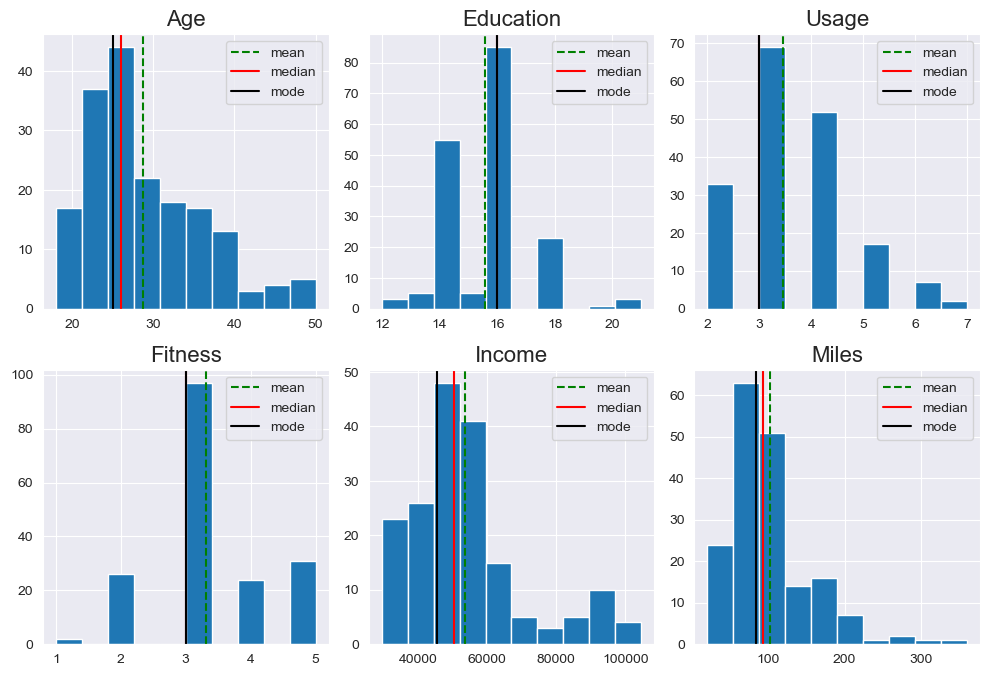

In [25]:
histogram_overview(data)

**Boxplot overview**

In [26]:
def boxplot_overview(data):
    """
    This function below generates a subplots of `box plots` &
    showing the `distribution of the numerical variable input with outliers`.

    * Generates subplots for each numerical variable in a three column structure.
    * The function takes the Pandas dataframe as the input
    * The function selects the numerical variables from the applied dataframe.
    * It shows the `mean` in the boxplot.
    * `sns.set_style` - sets the Seaborn theme
    * `subplot_nrows` - calculated number of subplot rows
    * `subplot_ncols` - configures the three column structure subplots
    * `figsize` - indicates the size of the plot
    * `sns.reset_defaults()` - resets Seaborn themes and settings to default
    """

    num_vars = data.select_dtypes(include=np.number).columns.to_list()
    plt.figure(figsize=(10, 10))
    for i in range(len(num_vars)):
        # Set seaborn theme
        sns.set_style("darkgrid")
        # Subplot no of columns
        subplot_ncols = math.ceil(np.sqrt(len(num_vars)) )  
        # Subplot no of rows
        subplot_nrows = math.ceil(len(num_vars) / subplot_ncols)  
          
        plt.subplot(subplot_nrows, subplot_ncols, i + 1)
        sns.boxplot(y=data[num_vars[i]], width=0.3, showmeans=True)
        plt.tight_layout()
        plt.title(num_vars[i], fontsize=16)
    plt.show()
    # Reset seaborn theme
    sns.reset_defaults()

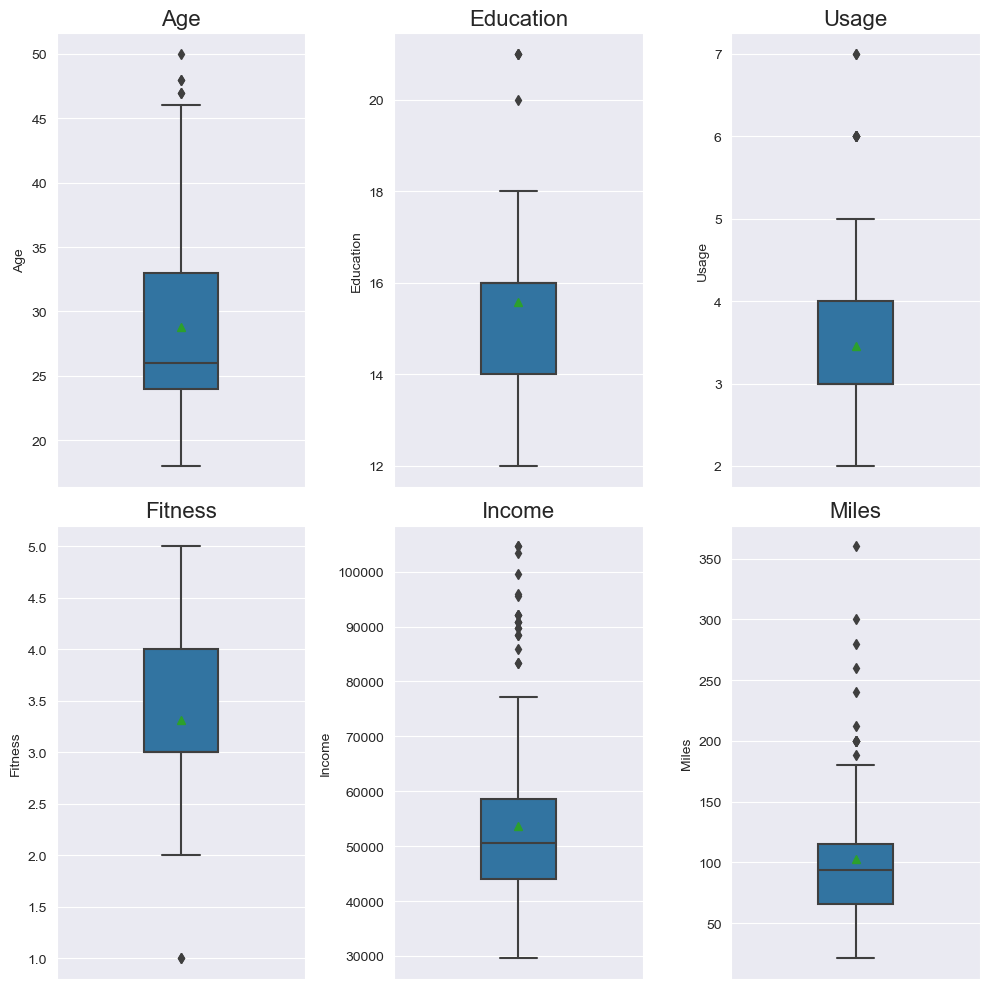

In [27]:
boxplot_overview(data)

### Categorical Variables

In [28]:
def bar_chart(data):
    """
    This function below generates a `bar chart` showing
    the `distribution of the categorical varible input`.
    * The function also `generates an image file` of the plot.
    * The function takes the Pandas series as the input.
    * It `computes the frequency of each unique element` and 
      displays the distribution of the elements to in horizontal bars.
    * The `percentage of each bar` is also calculated and placed to 
      the right end of each bar.
    * `sns.despine()` - removes the upper and right border of the chart
    * For each horizontal bar the width is calculated as a percentage of
      the entire quanta of datapoints.
    * The percentage is annotated to the each bar by plotting the cardinal locations.

    """

    # Create a horizontal count plot while sorting variables in descending order
    g = sns.countplot(y=data, order = data.astype(str).value_counts().index)
    # Remove the top and right spines from plot
    sns.despine()
    # length of the column
    col_length = len(data)
    for p in g.patches:
        # percentage of each class of the category
        percentage = '{:.1f}%'.format(100 * p.get_width()/col_length)
        # width of the plot
        x = p.get_x() + p.get_width() + 0.02
        # height of the plot
        y = p.get_y() + p.get_height()/2
        # annotate the percentage
        g.annotate(percentage, (x, y), size=12)
        plt.title("Distribution of {}".format(
            data.name), loc="center", fontsize=22)
    plt.show()
    # Line separator
    print('--'*55)

In [29]:
data.select_dtypes(exclude = np.number).columns.to_list()


['Product', 'Gender', 'MaritalStatus', 'AgeGroup', 'EducationLevel']

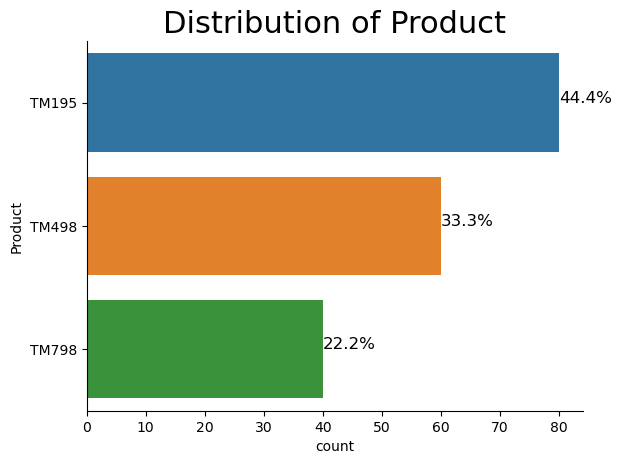

--------------------------------------------------------------------------------------------------------------


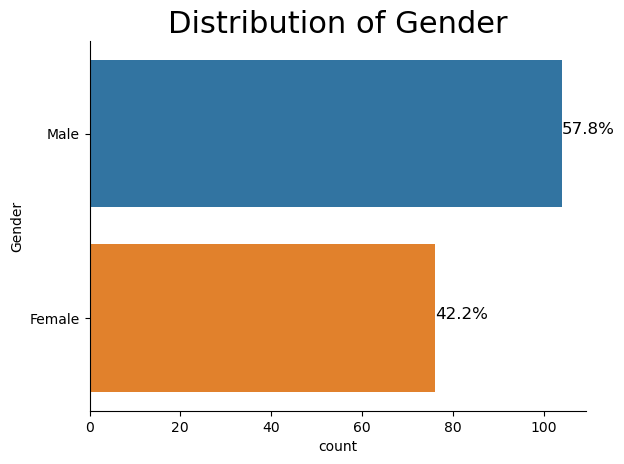

--------------------------------------------------------------------------------------------------------------


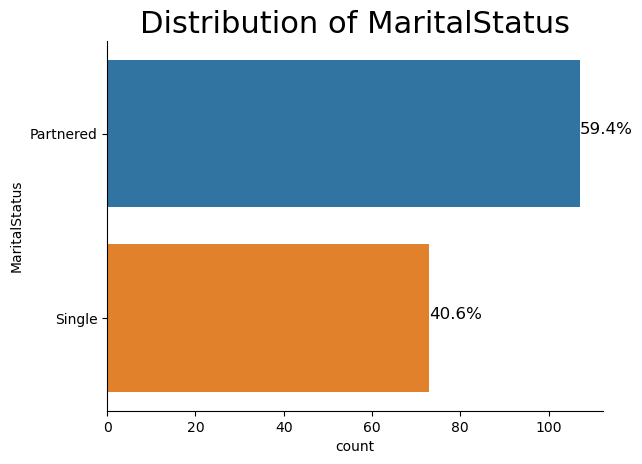

--------------------------------------------------------------------------------------------------------------


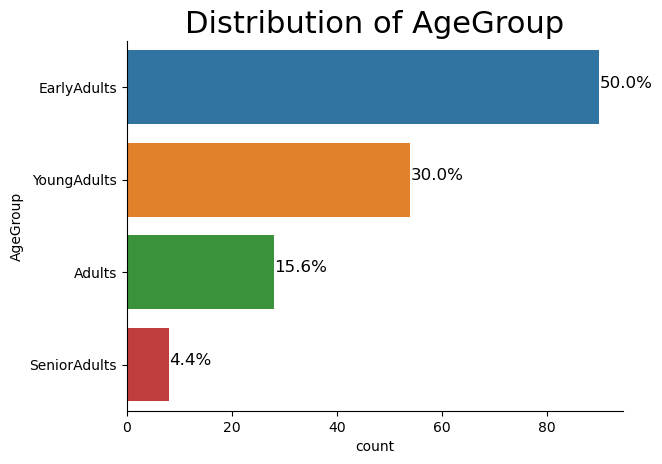

--------------------------------------------------------------------------------------------------------------


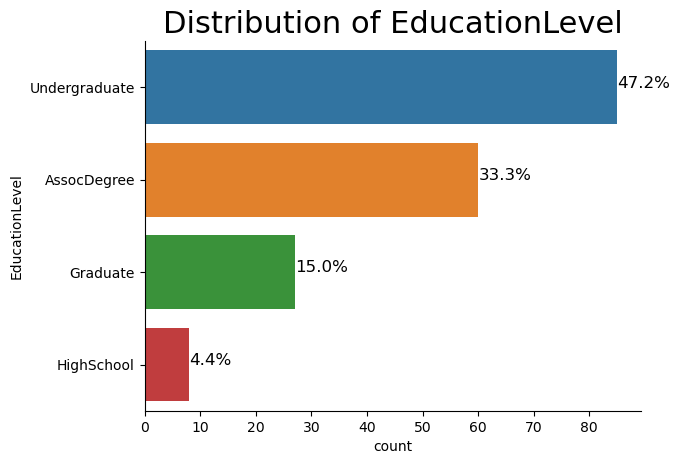

--------------------------------------------------------------------------------------------------------------


In [30]:
for each_var in data.select_dtypes(exclude = np.number).columns.to_list():
    plt.figure()
    bar_chart(data=data[each_var])

---

## Bivariate Analysis

### Heat Map

Create sub-dataframe removing binned numerical variables

In [31]:
data_binned = data.drop(columns=["Age", 'Education'])

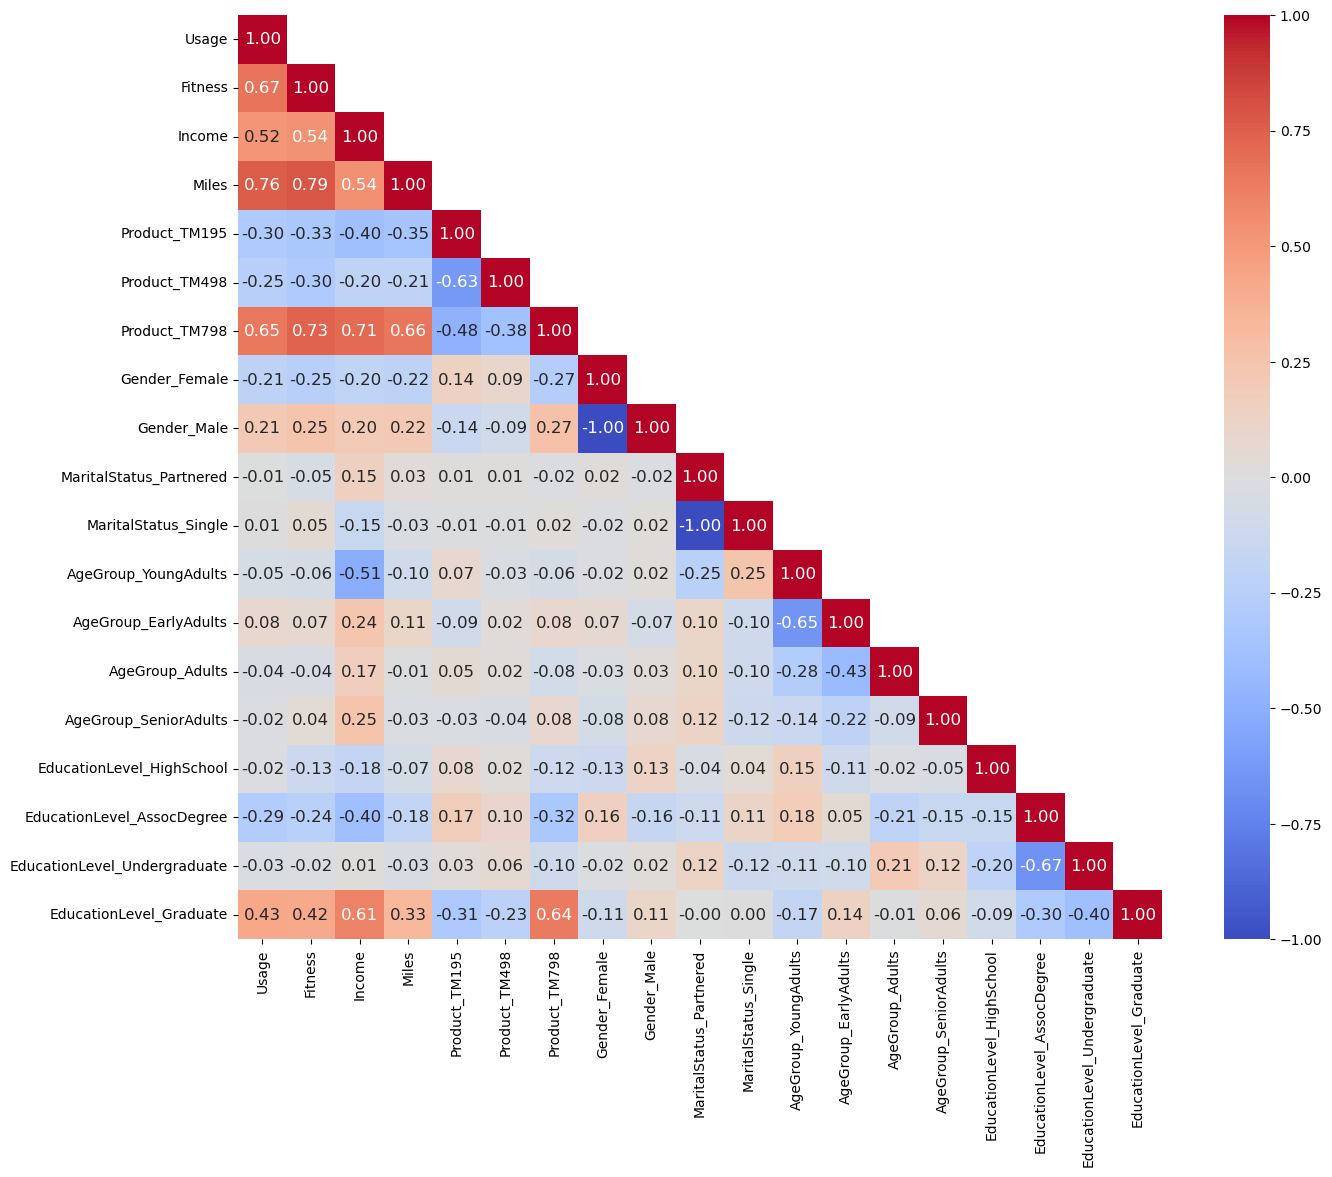

In [32]:
onehot = pd.get_dummies(data_binned,
                        columns=data_binned.select_dtypes(include=['category']).columns.tolist())
oh_corr = onehot.corr()

annot_kws = {"fontsize": 12}

symmetric_matrix = (oh_corr + oh_corr.T) / 2

# Create a mask for the upper half of the matrix
mask = np.triu(np.ones_like(symmetric_matrix), k=1)

plt.figure(figsize=(16, 12))
sns.heatmap(oh_corr, annot=True, fmt=".2f", mask=mask,
            cmap='coolwarm', square=True, annot_kws=annot_kws)
plt.yticks(rotation=0)
plt.show()

---

### Bivariate Pair Plots

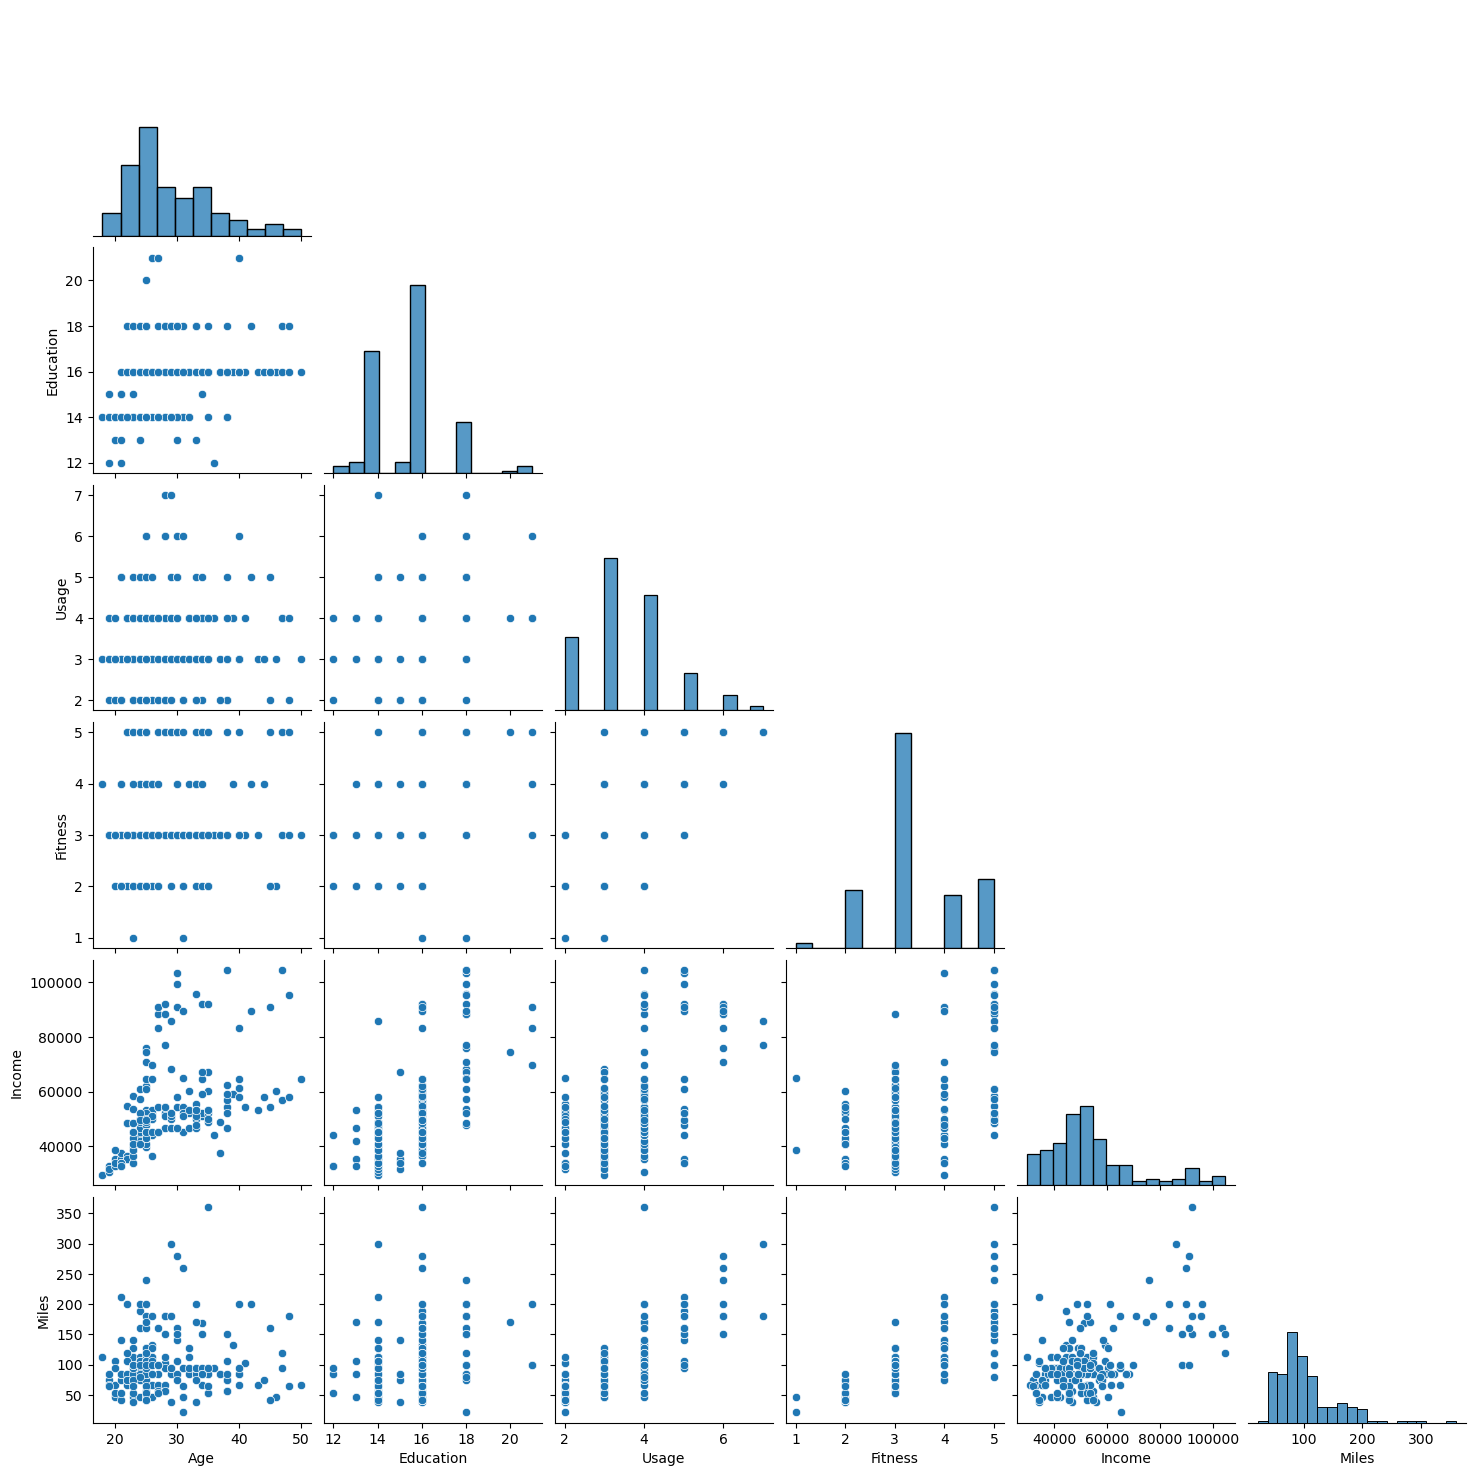

In [33]:
sns.pairplot(data[numeric_columns], corner=True)
plt.show();

---

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:black;"> Age vs Income

**Relationship between Income and Age with Gender**

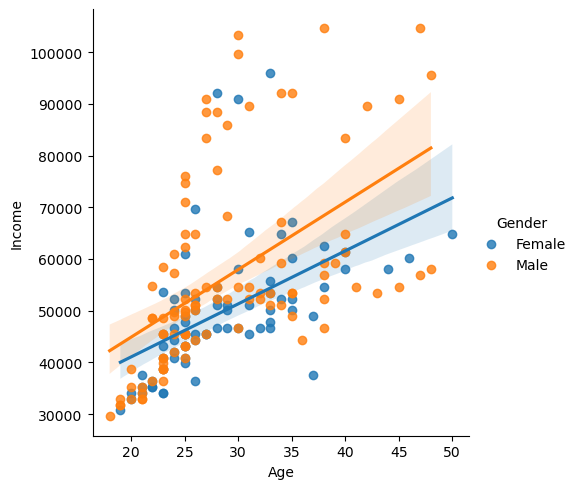

In [34]:
sns.lmplot(data=data, x="Age", y="Income", hue = "Gender")
plt.show();

**Observations**
* Male customers earned more income Female customers.

**Relationship between Income and Age with Product**

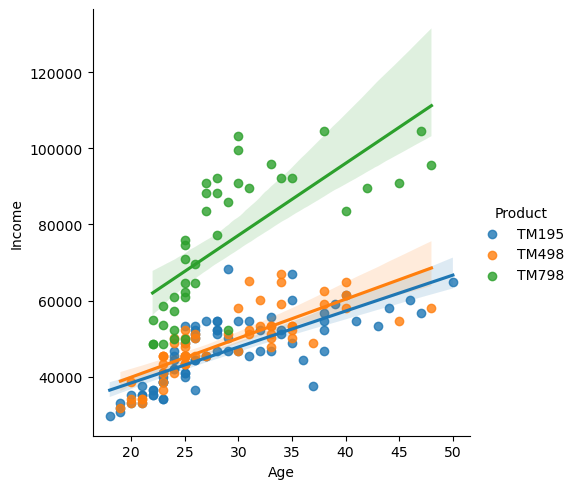

In [35]:
sns.lmplot(data=data, x="Age", y="Income", hue = "Product")
plt.show();

**Observations**
* Customers who earned more purchased the `TM798` model 

 ---

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:black;">Variable Exploration

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:black;">Categorical Variable Exploration

**Product by Gender**

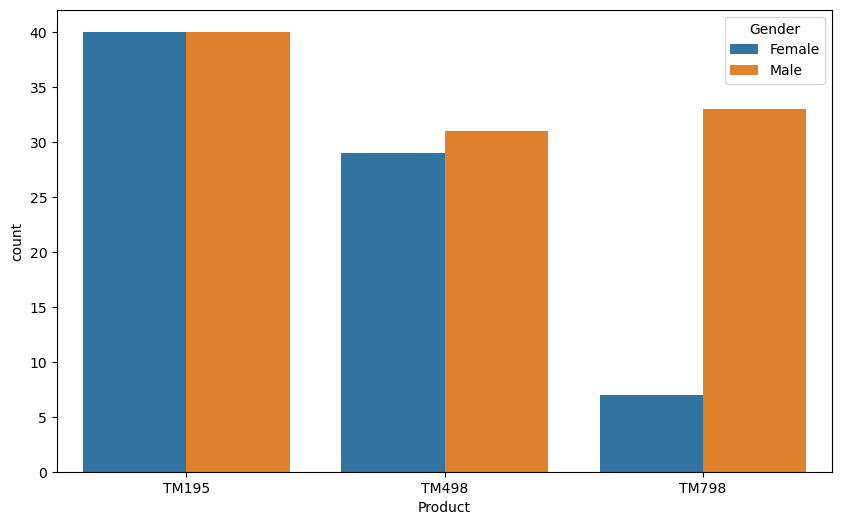

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", data=data, hue="Gender")
plt.show()

**Observations**
* The customers who purchase `TM195` are equally distributed between Male and Female
* Male customers significantly prefer the `TM798` model to Female customers. 
* Male customers purchased slightly more `TM498` than Females.

**Product by Marital Status**

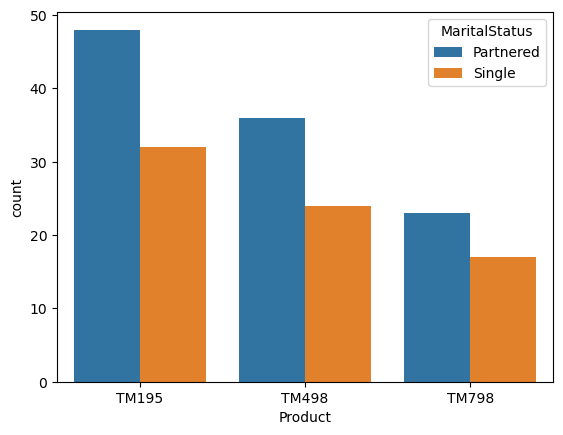

In [37]:
sns.countplot(x="Product",data=data, hue="MaritalStatus")
plt.show();

---

<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:black;">Ordinal Variable Exploration

**Education by Product**

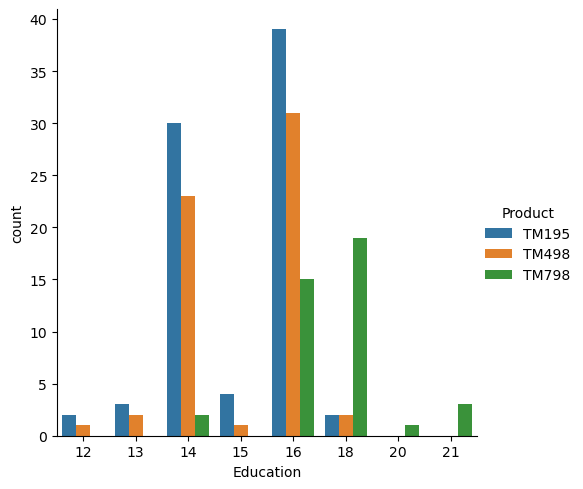

In [38]:
sns.catplot(x="Education", hue="Product",kind="count",data=data)
plt.show();

**Observations**
* Customers with more than 16 years of Education preferred the `TM798` model
* Customers at the around the median and mean age purchased the `TM195` model
* The `TM195` model was highly preferred by customers who had at most 16 years of Education.

**Education by Gender**

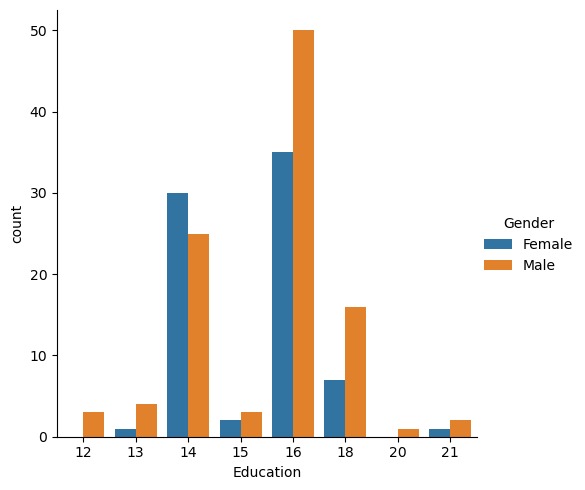

In [39]:
sns.catplot(x="Education", hue="Gender",kind="count",data=data)
plt.show();

**Education by Marital Status**

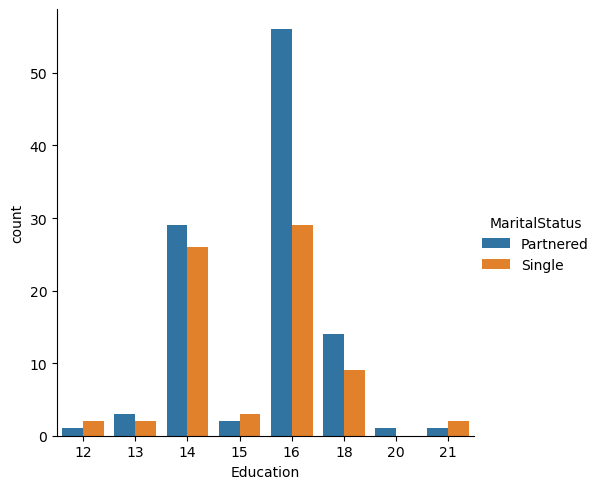

In [40]:
sns.catplot(x="Education", hue="MaritalStatus",kind="count",data=data)
plt.show();

**Usage by Product**

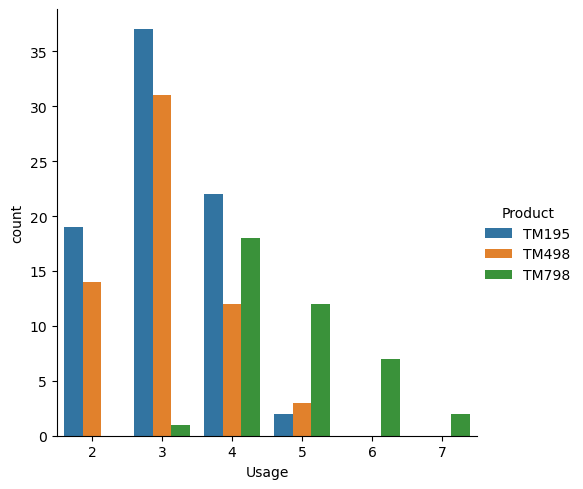

In [41]:
sns.catplot(x="Usage", hue="Product",kind="count",data=data)
plt.show()

**Observations**
* Customers who purchased the `TM195` and `TM498` models expect to use their treadmills at least twice per week and no more than 5 times per week.
* Most of these customers predict to use their treadmill 3 times per week
* The customers who purchased the `TM798` model expect to use the treadmill at least 3 times per week.

**Usage by Gender**

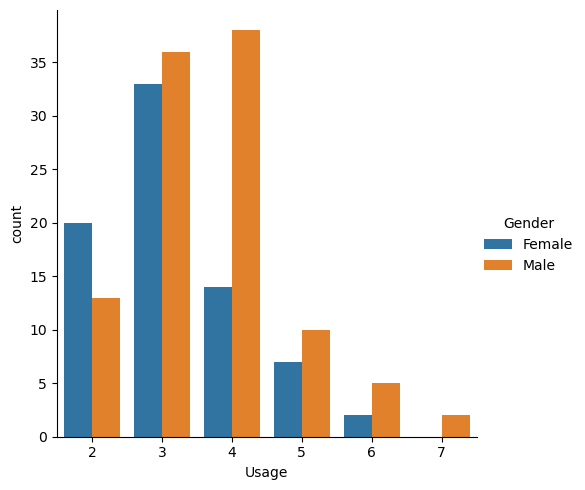

In [42]:
sns.catplot(x="Usage", hue="Gender",kind="count",data=data)
plt.show();

**Observations**
* Most of the female customers plan to use their treadmill 3 times per week
* Most of the male customers plan to use their treadmill 4 times per week.
* Male customers use their treadmill at a higher frequency per week

**Usage by Marital Status**

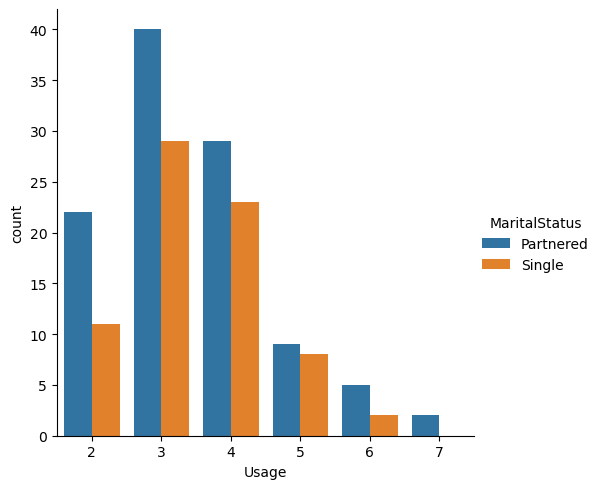

In [43]:
sns.catplot(x="Usage", hue="MaritalStatus",kind="count",data=data)
plt.show();

**Observations***
* Customers who live in partnered relationships plan to use their treadmills more than single customers

**Fitess by Product**

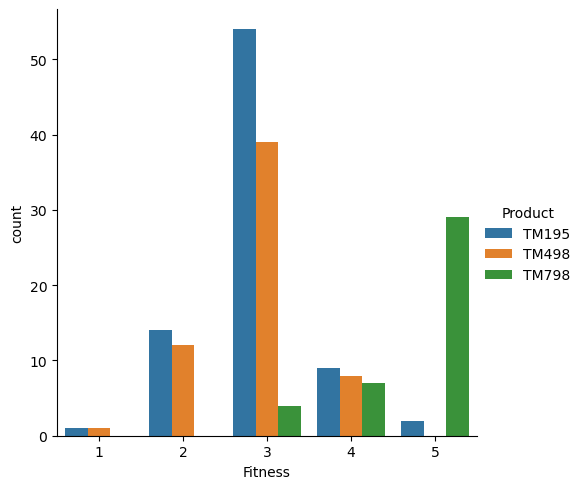

In [44]:
sns.catplot(x="Fitness", hue="Product",kind="count",data=data)
plt.show();

**Observations**
* Customers who purchased the `TM195` and `TM498` treadmills ranked their fitness as average on the 1-5 scale
* Customers who ranked themselves as being fitter favoured the `TM798` model.

**Fitess by Gender**

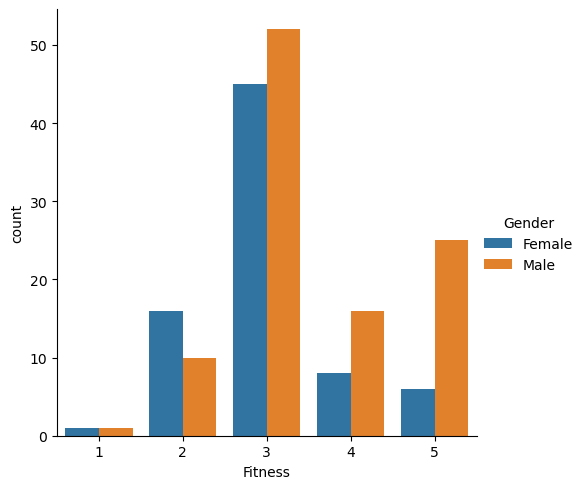

In [45]:
sns.catplot(x="Fitness", hue="Gender",kind="count",data=data)
plt.show();

**Observations**
* The `Male` customers ranked themselves fitter compared to `Female` customers

**Fitess by MaritalStatus**

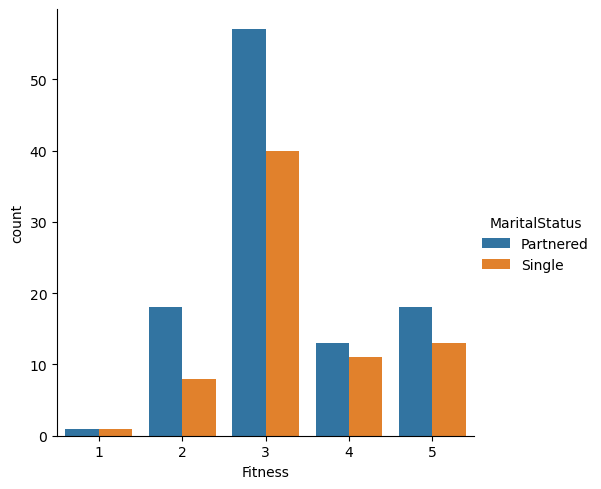

In [46]:
sns.catplot(x="Fitness", hue="MaritalStatus",kind="count",data=data)
plt.show();

**Observations**
* The customers in `Partnered` relationships ranked themselves fitter to their `Single`counterparts.

---

<span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:blue;">Continuous Variable Exploration

**Product by Age**

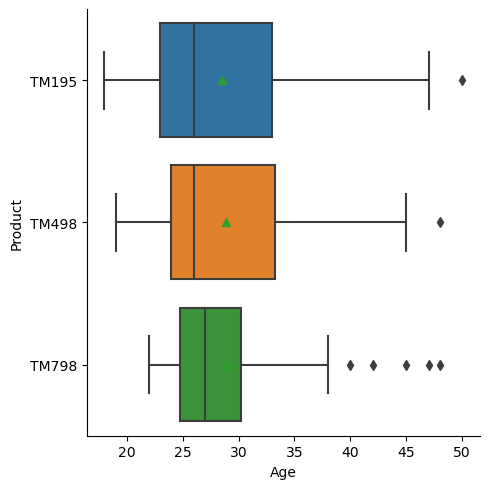

In [47]:
sns.catplot(x="Age", y="Product", kind="box", data=data, showmeans=True)
plt.show();

**Observations**
* The Age range distribution of all customers are heavily right skewed.
* The `TM195` Customers Age range was greater than both the `TM498` and `TM798`. This indicated the `TM195` is popular choice.
* The `TM798` customers had the smallest Age range with the most outliers. This indicates most of the customers are young adults.

**Product by Age with Gender split**

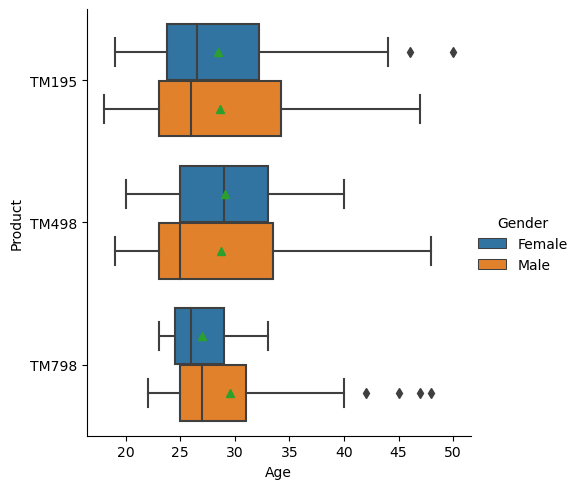

In [48]:
sns.catplot(x="Age", y="Product", kind="box", data=data, showmeans=True, hue="Gender")
plt.show();

**Observations**
* The distribution of Female customers who purchased the `TM498` resembles a normal distribution
* Male customers who purchased `TM798` spanned a wider age range than the Female customers.
* The Age ranges of the Female customers across each model were less than the Males.

**Product by Age with Marital Status split**

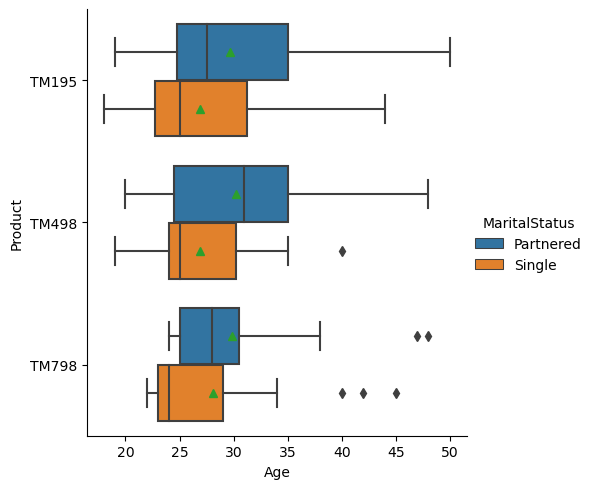

In [49]:
sns.catplot(x="Age", y="Product", kind="box", data=data, showmeans=True, hue="MaritalStatus")
plt.show();

**Observations**
* The mean Age of Partnered customers were greater than the Single customers across each model
* The Partnered customers accounted for older customers across each model.

**Product by Income**

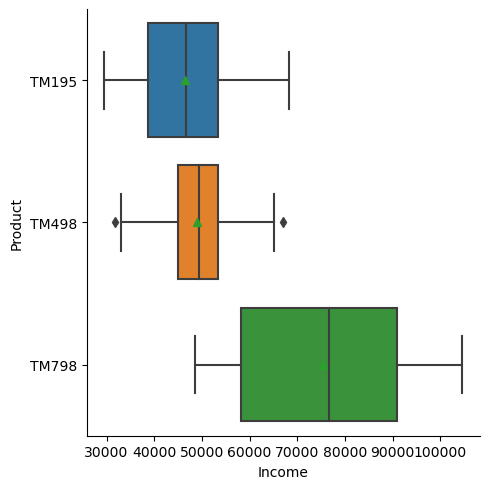

In [50]:
sns.catplot(x="Income", y="Product", kind="box", data=data, showmeans=True)
plt.show();

**Observations**
* The TM798 customers the highest income earners

**Product by Income with Gender split**

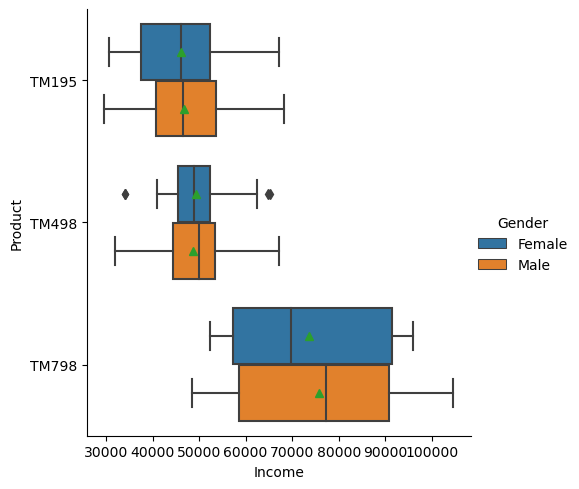

In [51]:
sns.catplot(x="Income", y="Product", kind="box", data=data, showmeans=True, hue="Gender")
plt.show();

**Observations**
* Male customers who bought the TM798 model earned more and a wider range of income compared to the Female customers.

**Product by Income with Marital Status split**

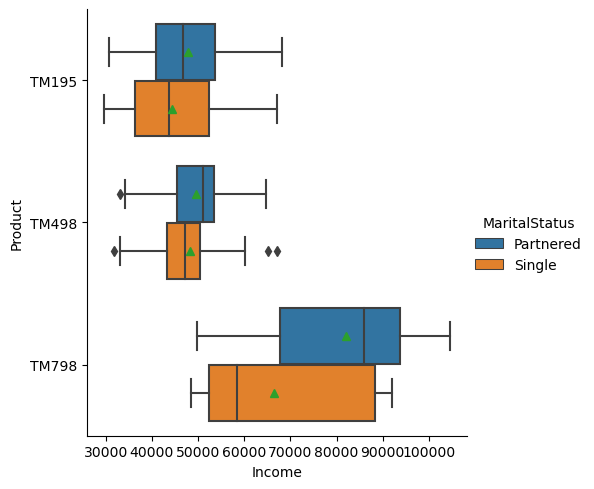

In [52]:
sns.catplot(x="Income", y="Product", kind="box", data=data, showmeans=True, hue="MaritalStatus")
plt.show();

**Observations**
* Partnered Customers earned higher average income compared to the Single customers.

**Product by Miles**

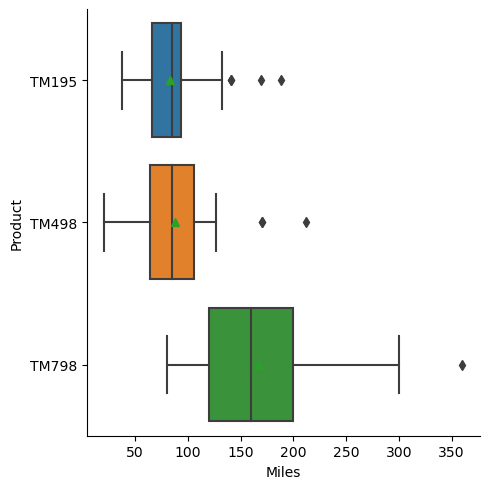

In [53]:
sns.catplot(x="Miles", y="Product", kind="box", data=data, showmeans=True)
plt.show();

**Observations**
* Customers who purchased the `TM798` model expected to run more miles and in some cases up to twice the amount of miles.

**Product by Miles with Gender split**

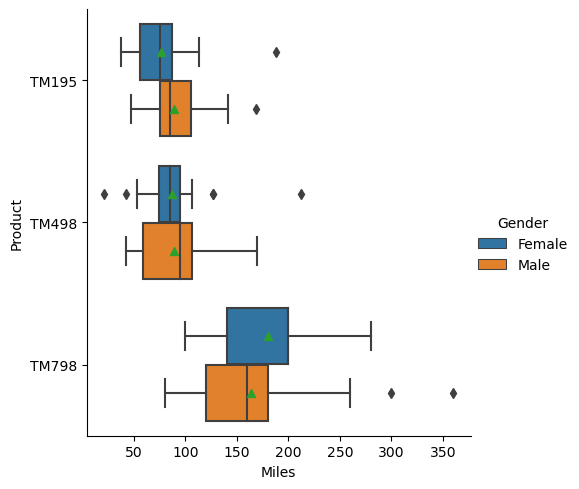

In [54]:
sns.catplot(x="Miles", y="Product", kind="box", data=data, showmeans=True, hue="Gender")
plt.show();

**Observations**
* Female customers who bought the `TM798` model expect to run a higher average number of miles than the Male customers.

**Product by Miles with Marital Status split**

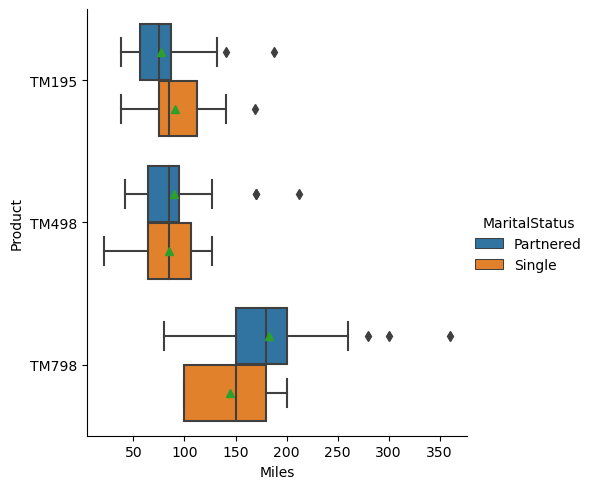

In [55]:
sns.catplot(x="Miles", y="Product", kind="box", data=data, showmeans=True, hue="MaritalStatus")
plt.show();

**Observations**
* Customers who bought the TM798 model and living in a Partnered relationship expect to up to maximum of 250 miles per week.

---

---

# Business Questions

<a id="Question1"></a>
## How do customer demographics (age, gender, education, marital status) compare across purchasers of the 3 treadmill models?

**Treadmill model vs Customer Age**

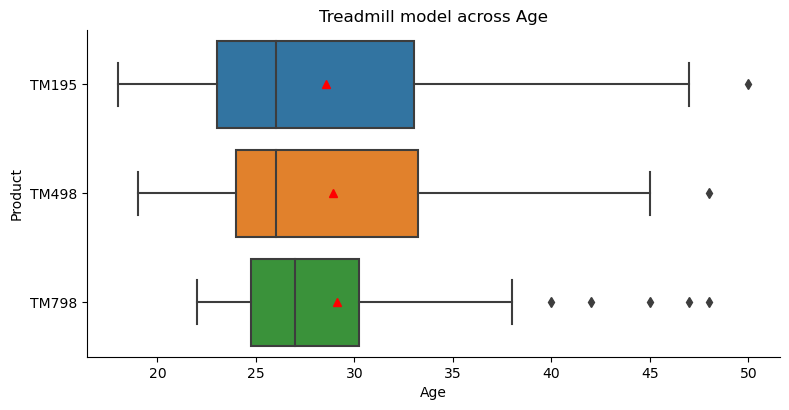

In [56]:
# Plot of Treadmill model against customer age

sns.catplot(x='Age',
            y='Product',
            kind="box",
            data=data,
            showmeans=True, 
            meanprops={"markerfacecolor": "red", "markeredgecolor": "red"},
            height=4,
            aspect=2,
            orient='h')
plt.title("Treadmill model across Age")
plt.show()

**Treadmill model vs Customer Age Group**

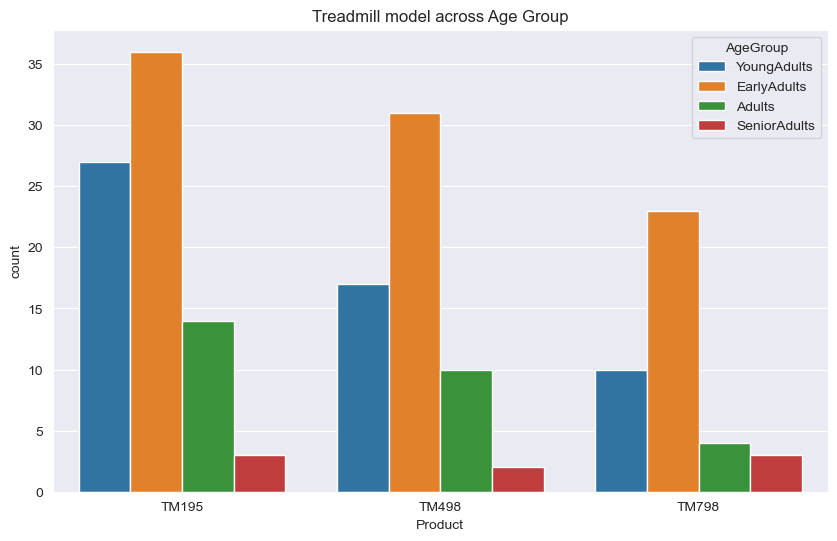

In [57]:
# Plot of treadmill model count against Age Group
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", data=data, hue="AgeGroup")
plt.title("Treadmill model across Age Group")
plt.show()

**One way ANOVA for statistical significance of Customer Age across models**

In [58]:
# Group your data by 'Product' and select the 'Usage' column
grouped_age_data = [group['Age']
                    for name, group in data.groupby('Product')]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_age_data)

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean age of customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean age of customers.")

F-statistic: 0.09421786067805005
P-value: 0.9101300808730235
Fail to reject the null hypothesis. There is no significant difference in mean age of customers.


---

**Treadmill model across Gender**

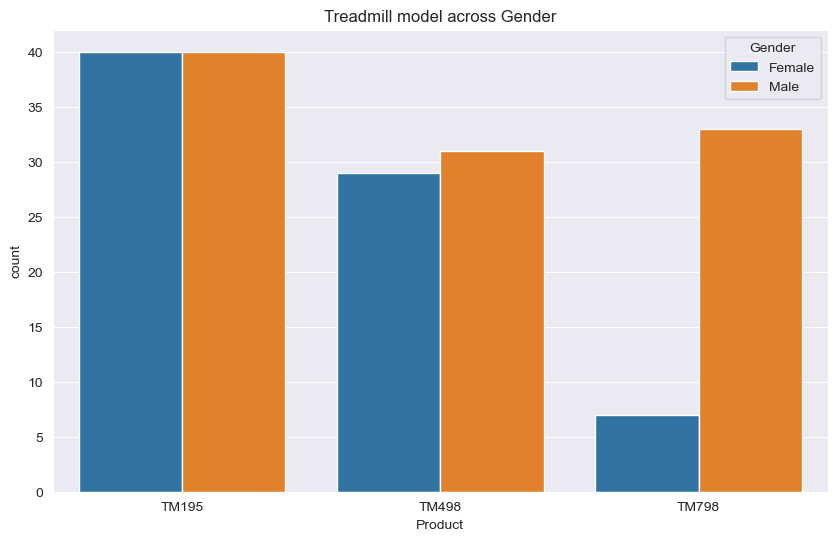

In [59]:
# Plot of treadmill model count against gender
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", data=data, hue="Gender")
plt.title("Treadmill model across Gender")
plt.show()

In [60]:
# Group your data by 'Product' and 'Gender' and count occurrences
grouped_gender_data = pd.crosstab(data['Product'], data['Gender'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(grouped_gender_data)

# Display the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Set your significance level
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Product and Gender.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Product and Gender.")

Chi-squared statistic: 12.923836032388664
P-value: 0.0015617972833158714
Reject the null hypothesis. There is a significant relationship between Product and Gender.


---

**Treadmill model vs Customer Education**

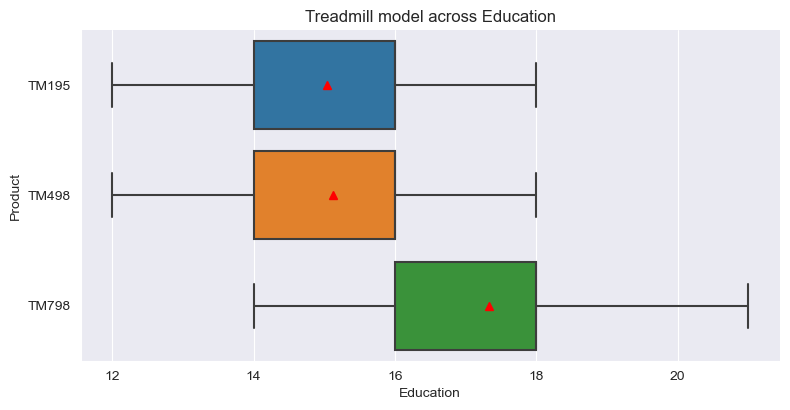

In [61]:
# Plot of Treadmill model against customer education

sns.catplot(x='Education',
            y='Product',
            kind="box",
            data=data,
            showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "red"},
            height=4,
            aspect=2,
            orient='h')
plt.title("Treadmill model across Education")
plt.show()

**Treadmill model vs Customer Education Level**

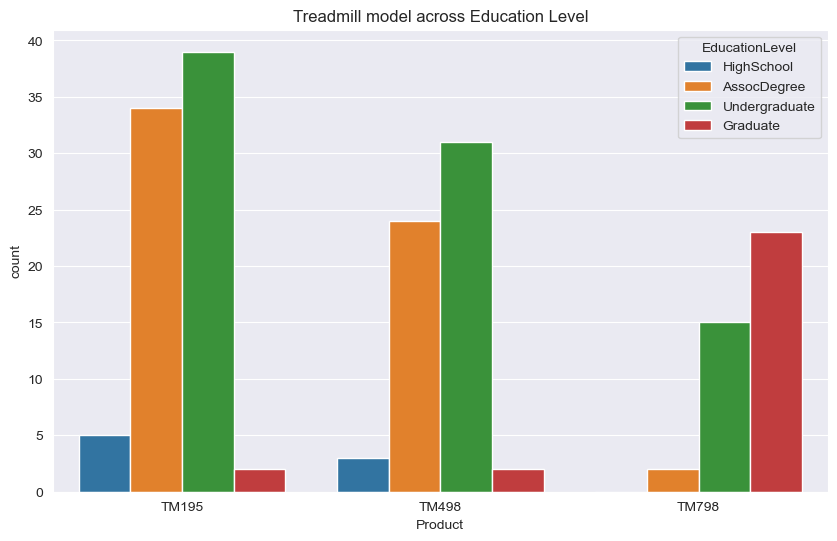

In [62]:
# Plot of treadmill model count against Education Level
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Product", data=data, hue="EducationLevel")
plt.title("Treadmill model across Education Level")
plt.show()

In [63]:
# Group your data by 'Product' and 'Education' and count occurrences
grouped_education_data = pd.crosstab(data['Product'], data['Education'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(grouped_education_data)

# Display the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Set your significance level
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Product and Education.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Product and Education.")

Chi-squared statistic: 79.8846547314578
P-value: 2.9724307024156666e-11
Reject the null hypothesis. There is a significant relationship between Product and Education.


---

**Treadmill model vs Customer Marital Status**

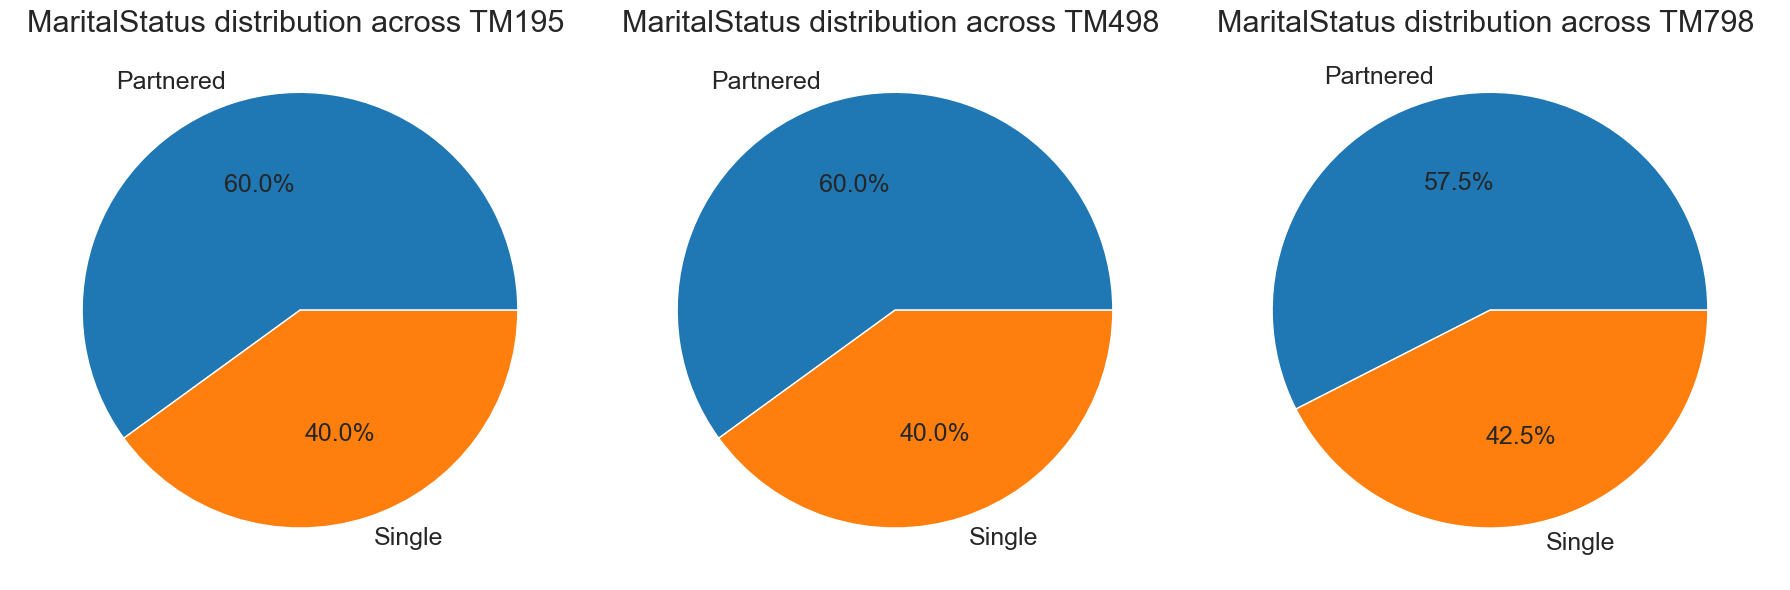

In [64]:
# Group your data by 'Product' and 'MaritalStatus' and count occurrences
grouped_marital_data = data.groupby(
    by=['Product', 'MaritalStatus']).size().unstack(fill_value=0)

# Determine the number of rows and columns for your subplot grid
num_rows = 1  # You can change this as needed
num_cols = len(grouped_marital_data.index)

# Create a figure and subplot grid
# Adjust the figure size as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6))

# Increase the font sizes
title_fontsize = 22
label_fontsize = 18

# Create a pie chart for each 'Product' group and place them side by side
for i, (product, counts) in enumerate(grouped_marital_data.iterrows()):
    ax = axes[i]
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%',
           textprops={'fontsize': label_fontsize})
    ax.set_title(
        f'MaritalStatus distribution across {product} ', fontsize=title_fontsize)
    ax.axis('equal')  # Equal aspect ratio ensures that the pie is circular

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

plt.show()

In [65]:
# Group your data by 'Product' and 'MaritalStatus' and count occurrences
grouped_marital_data = pd.crosstab(data['Product'], data['MaritalStatus'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(grouped_marital_data)

# Display the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Set your significance level
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Product and MaritalStatus.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Product and MaritalStatus.")

Chi-squared statistic: 0.0806554858532839
P-value: 0.9604745988058153
Fail to reject the null hypothesis. There is no significant relationship between Product and MaritalStatus.


---

**Observations:**

CardioGood should take an inclusive approach in marketing that avoids targeting narrow age ranges or lifestyles. Messaging and imagery for all models should appeal to a wide cross-section of adults across generations and relationship statuses. However, the data indicates opportunities to fine-tune brand positioning and partnerships by model based on core customer segments.

The TM195 treadmill should be promoted toward younger millennial fitness enthusiasts entering the category, highlighting introductory pricing and features. For the premium TM798 model, marketing should focus on performance-driven male runners based on their significant representation in this segment. Tactics like in-gym promotions and running event sponsorships can effectively reach this group. Additionally, TM798 messaging should highlight productivity features and advanced training data to align with educated professionals drawn to this top-tier model. In summary, while taking an inclusive approach, targeted outreach to align with the core demographics of each customer segment can help strengthen treadmill model positioning and marketing effectiveness.

<a href="#Objectives">Go to Objectives</a>

---

<a id="Question2"></a>
## Is there a relationship between customer income level and the treadmill model purchased?

**Treadmill model vs Customer Income**

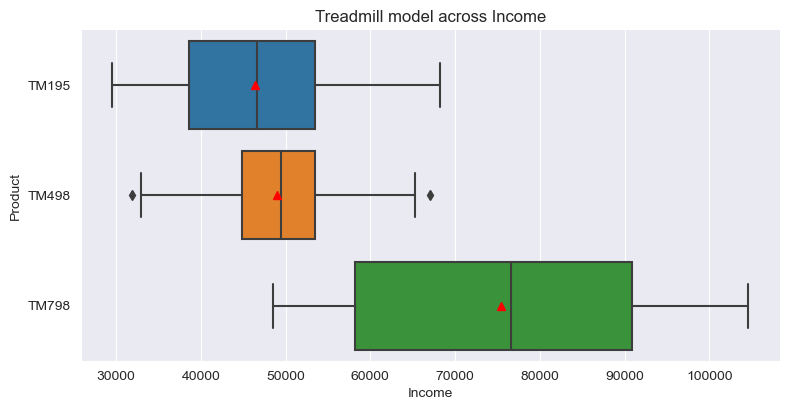

In [66]:
# Plot of Treadmill model against customer income

sns.catplot(x='Income',
            y='Product',
            kind="box",
            data=data,
            showmeans=True,
            meanprops={"markerfacecolor": "red", "markeredgecolor": "red"},
            height=4,
            aspect=2,
            orient='h')
plt.title("Treadmill model across Income")
plt.show()

**Mean Income across Treadmill models**

In [67]:
# Mean of Income across Treadmill models
data.groupby(by='Product').Income.mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

**One way ANOVA for statistical significance of Customer Income across models**

In [68]:
# Group your data by 'Product' and select the 'Usage' column
grouped_income_data = [group['Income']
                       for name, group in data.groupby('Product')]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_income_data)

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean customer income.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean customer income.")

F-statistic: 89.25903546601671
P-value: 1.5644991316342494e-27
Reject the null hypothesis. There is a significant difference in mean customer income.


**Observations:**

This analysis found income level strongly correlates with treadmill model selection. Specifically, the data showed customers with higher incomes overwhelmingly prefer the premium TM798 model.

To leverage this, CardioGood should make income a key factor in shaping TM798 marketing strategy and targeting. Messaging and partnerships should focus on highlighting the superior quality, performance, and prestige of the TM798. This positions it as an aspirational product for high-income earners. Tactics like digital ads geo-targeted by income levels can help reach affluent professionals identified as top prospects. Additionally, brand sponsorships of luxury events popular with wealthy consumers can further strengthen TM798's premium branding. In summary, showcasing the TM798 as a top-of-the-line model will resonate with high income customers and drive growth in this profitable segment.

<a href="#Objectives">Go to Objectives</a>

---

<a id="Question3"></a>
## Do trends emerge in the expected usage frequencies and weekly mileage across the 3 product models?

**Usage distribution across treadmill models**

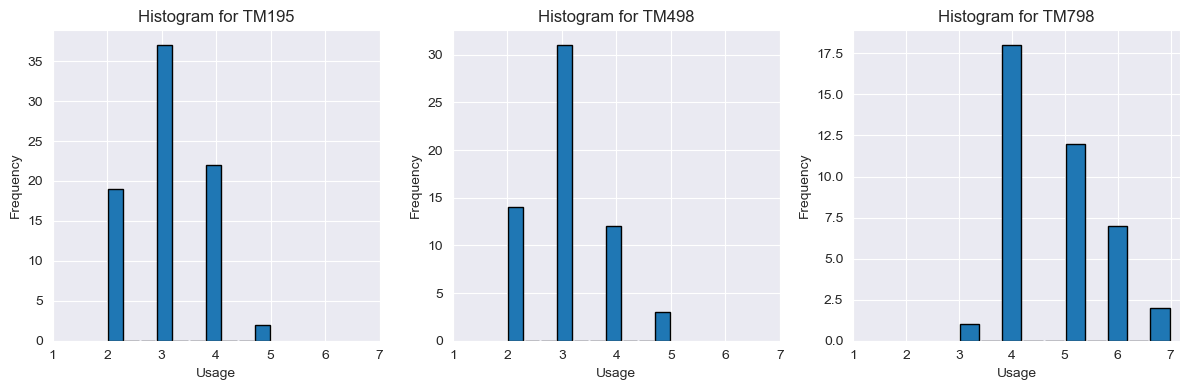

In [69]:
# Create a list of unique products in your data
Tmodels = data['Product'].unique()

# Determine the number of rows and columns for your subplot grid
num_rows = 1
num_cols = len(Tmodels)

# Create a figure and subplot grid
# Adjust the figure size as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

# Create a separate plot for each product
for i, product in enumerate(Tmodels):
    data[data['Product'] == product]['Usage'].hist(
        ax=axes[i], bins=10, rwidth=0.9, edgecolor='k')
    axes[i].set_title(f'Histogram for {product}')
    axes[i].set_xlabel('Usage')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(range(1, 8, 1))  # Set integer values as x-axis ticks

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

plt.show()

**Summary statistics of Usage**

In [70]:
data.groupby(by='Product')['Usage'].describe()

count      mean       std  min  25%  50%   75%  max
Product                                                     
TM195     80.0  3.087500  0.782624  2.0  3.0  3.0  4.00  5.0
TM498     60.0  3.066667  0.799717  2.0  3.0  3.0  3.25  5.0
TM798     40.0  4.775000  0.946993  3.0  4.0  5.0  5.00  7.0

**One way ANOVA for statistical significance of Customer Usage across models**

In [71]:
# Group your data by 'Product' and select the 'Usage' column
grouped_usage_data = [group['Usage'] for name, group in data.groupby('Product')]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_usage_data)

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean usage frequency.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean usage frequency.")

F-statistic: 65.44446547156178
P-value: 5.281513288947641e-22
Reject the null hypothesis. There is a significant difference in mean usage frequency.


---

**Miles distribution across treadmill models**

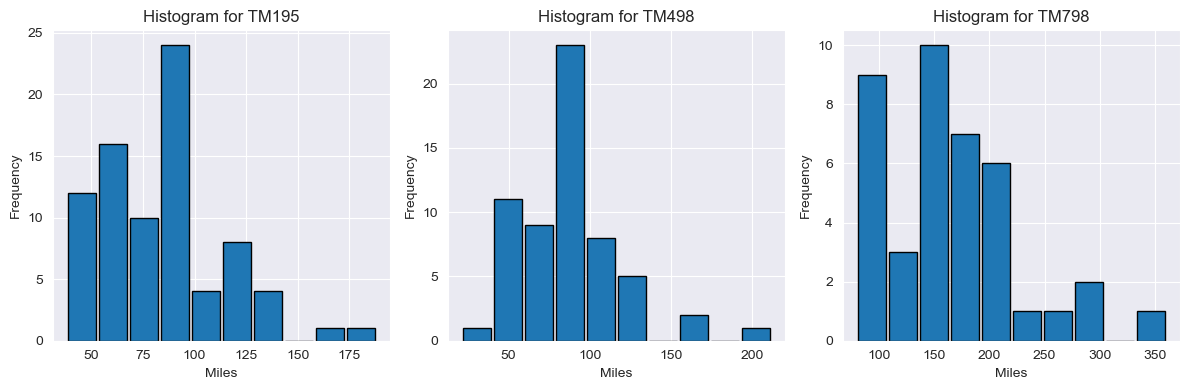

In [72]:
# Create a list of unique products in your data
Tmodels = data['Product'].unique()

# Determine the number of rows and columns for your subplot grid
num_rows = 1
num_cols = len(Tmodels)

# Create a figure and subplot grid
# Adjust the figure size as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

# Create a separate plot for each product
for i, product in enumerate(Tmodels):
    data[data['Product'] == product]['Miles'].hist(
        ax=axes[i], bins=10, rwidth=0.9, edgecolor='k')
    axes[i].set_title(f'Histogram for {product}')
    axes[i].set_xlabel('Miles')
    axes[i].set_ylabel('Frequency')

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

plt.show()

**Summary statistics of Miles**

In [73]:
data.groupby(by='Product')['Miles'].describe()

count        mean        std   min    25%    50%    75%    max
Product                                                                
TM195     80.0   82.787500  28.874102  38.0   66.0   85.0   94.0  188.0
TM498     60.0   87.933333  33.263135  21.0   64.0   85.0  106.0  212.0
TM798     40.0  166.900000  60.066544  80.0  120.0  160.0  200.0  360.0

**One way ANOVA for statistical significance of Customer Miles across models**

In [74]:
# Group your data by 'Product' and select the 'Usage' column
grouped_miles_data = [group['Miles'] for name, group in data.groupby('Product')]

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*grouped_miles_data)

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean miles frequency.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean miles frequency.")

F-statistic: 68.24179605090241
P-value: 1.0730574762130848e-22
Reject the null hypothesis. There is a significant difference in mean miles frequency.


---

**Observations:**

This analysis uncovered distinct usage profiles associated with each treadmill model. For the entry-level TM195, the majority of customers expected to use the treadmill sparingly, with average weekly usage of just 2-3 times. 25% of TM195 buyers plan to use the treadmill only once per week or less, indicating they purchased this model primarily for light or occasional cardio activity.

In contrast, customers of the mid-range TM498 model averaged 3-4 uses per week - a moderate increase versus TM195. For top-tier TM798, average weekly usage was highest at 3-5 times. The TM798 attracts committed runners looking to use their home treadmill consistently to train throughout the week.

Similar trends were seen for expected mileage. Average miles per week for TM195 customers peaked at 20-30. TM498 buyers saw a moderate uptick in planned mileage to 30-40 weekly miles. For TM798, average miles jumped substantially to 50+ miles per week, with some customers expecting to log over 100 miles.

These insights paint a picture of three distinct user profiles attached to each model. The TM195 appeals to casual walkers or light joggers. The TM498 suits users looking for consistency in moderate running. And the TM798 is optimized for enthusiasts training at high mileages.

---

<a href="#Objectives">Go to Objectives</a>

---

---